## softmax를 이용한 MNIST 데이터 학습

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 2.585537040
Epoch: 0002 cost = 1.069761497
Epoch: 0003 cost = 0.860287841
Epoch: 0004 cost = 0.756047318
Epoch: 0005 cost = 0.689340877
Epoch: 0006 cost = 0.641480411
Epoch: 0007 cost = 0.604843244
Epoch: 0008 cost = 0.575857621
Epoch: 0009 cost = 0.551710922
Epoch: 0010 cost = 0.531530286
Epoch: 0011 cost = 0.514342474
Epoch: 0012 cost = 0.499376533
Epoch: 0013 cost = 0.486139046
Epoch: 0014 cost = 0.474116336
Epoch: 0015 cost = 0.463867946
Accuracy:  0.8878
Label: [1]
Prediction: [1]


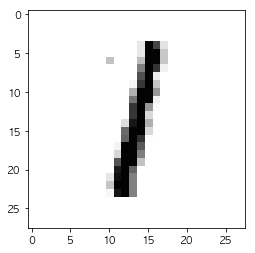

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10
learning_rate = 0.1

X = tf.placeholder(tf.float32, [None, 784])

Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hyphthesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hyphthesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

is_correct = tf.equal(tf.arg_max(hyphthesis, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# 에폭
training_epochs = 15 # 전체 데이터를 한번 다 학습시킨 것을 1 에폭이라 한다.
batch_size = 100     # 한번에 몇개씩 학습시킬 것인가.

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            # 배치 사이즈 100
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
    # 테스트 데이터를 이용해 정확도 검증
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # 임의의 데이터를 뽑아 잘 예측하는지 확인해보기.
    r = random.randint(0, mnist.test.num_examples - 1)
    
    # label은 원-핫 인코딩으로 되어있으므로 가장 크기가 큰 인덱스가 곧 해당 숫자이다.
    print("Label:", sess.run(tf.arg_max(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.arg_max(hyphthesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
    

## Hidden Layer를 추가하여 정확도를 높여보자
### + Xavier 초기화를 이용해 초기화 잘해보기
### + Dropout을 이용해 over-fitting 방지하기

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 1.787995259
Epoch: 0002 cost = 1.638308868
Epoch: 0003 cost = 1.625795757
Epoch: 0004 cost = 1.625590219
Epoch: 0005 cost = 1.568509046
Epoch: 0006 cost = 1.553394908
Epoch: 0007 cost = 1.563160105
Epoch: 0008 cost = 1.559503732
Epoch: 0009 cost = 1.575938160
Epoch: 0010 cost = 1.574792636
Epoch: 0011 cost = 1.572664163
Epoch: 0012 cost = 1.571084289
Epoch: 0013 cost = 1.573846337
Epoch: 0014 cost = 1.576273384
Epoch: 0015 cost = 1.562760983
Accuracy:  0.9174
Label: [5]
Prediction: [5]


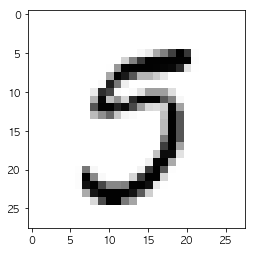

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10
learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

keep_prob = tf.placeholder(tf.float32)

with tf.variable_scope("layers__", reuse=None) as scope:
    # Xavier 초기화!! -> weight값 초기화를 잘해보자
    # tf.Variable -> tf.get_variable
    W1 = tf.get_variable("W1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([512]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

    W2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([512]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
    
    W3 = tf.get_variable("W3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([512]))
    L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
    
    W4 = tf.get_variable("W4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([512]))
    L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
    L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
    
    W5 = tf.get_variable("W5", shape=[512, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal([nb_classes]))

# 출력층에서는 softmax함수 사용
hyphthesis = tf.nn.softmax(tf.matmul(L4, W5) + b5)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hyphthesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

is_correct = tf.equal(tf.arg_max(hyphthesis, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# 에폭
training_epochs = 15 # 전체 데이터를 한번 다 학습시킨 것을 1 에폭이라 한다.
batch_size = 100     # 한번에 몇개씩 학습시킬 것인가.

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            # 배치 사이즈 100
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.7})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
    # 테스트 데이터를 이용해 정확도 검증
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0}))
    
    # 임의의 데이터를 뽑아 잘 예측하는지 확인해보기.
    r = random.randint(0, mnist.test.num_examples - 1)
    
    # label은 원-핫 인코딩으로 되어있으므로 가장 크기가 큰 인덱스가 곧 해당 숫자이다.
    print("Label:", sess.run(tf.arg_max(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.arg_max(hyphthesis, 1), feed_dict={X: mnist.test.images[r:r+1], keep_prob: 1.0}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
    